[<- Anterior](lassoregression.ipynb) | [Próximo ->](elasticnetregression.ipynb)

# Regressão Ridge

Uma Regressão Ridge é um modelo de Regressão Linear que inclui um termo de penalização na função de custo. Dessa forma é possivel evitar overfiting e melhorar a capacidade de generalização do modelo.

Essa penalização em modelos de regressão Ridge é feita através da soma dos quadrados dos coeficientes do modelo.

**O que será abordado**
- Imports
- Dados de teste
- Regressão Ridge
- Treinamento do modelo
- Realizando Previsões com o modelo

> AVISO: Temas relacionados à divisão dos dados não serão aprofundados nesse documento, porém, explicações sobre esse processo podem ser encontradas na pasta [Validacao](../Validacao/README.md)

# Imports

In [1]:
# Import da biblioteca numpy -> Utilizada para criar conjuntos de dados de teste
import numpy as np

# Import da Biblioteca matplotlib -> Utilizada para criar uma comparação visual dos dados previstos pelo modelo
import matplotlib.pyplot as plt

# Import da função train_test_split
from sklearn.model_selection import train_test_split

# Import da Classe LinearRegression -> Utilizada para criar o modelo de regressão linear
from sklearn.linear_model import Ridge

# Dados de teste

Nessa seção será desenvolvido um código com numpy que visa criar um conjunto de dados que possa ser usado para o teste de um modelo de Regressão Ridge.

In [2]:
# Define uma seed para a criação de valores aleátorios -> Garante que os dados gerados serão os mesmos e todas as execuções, possibilitando analises reprodutiveis
np.random.seed(42)

# Criação do conjunto de features
x = np.random.rand(100, 3) * 10

# Criação do conjunto de targets
y = 3 * x[:, 0] + 1.5 * x[:, 1] - 2 * x[:, 2] + np.random.randn(100) * 2

**Explicação dos dados:**
- x -> A função `np.random.rand(100, 3)` cria uma matriz de 100 linhas e 3 coluna com valores de 0 a 1. Multiplicar os valores por 10 implica que esses números são distribuídos de 0 a 10

- y -> a expressão `3 * x[:, 0] + 1.5 * x[:, 1] - 2 * x[:, 2]` faz com que a relação entre cada valor de x e y seja linear. Já a expressão `+ np.random.randn(100) * 2` faz com que um ruido seja adicionado aos dados, o que é comum em casos reais.

# Ridge Regression

Para criar o modelo de Regressão Ridge, é necessário criar um objeto da classe **Ridge**. Isso pode ser feito através da sintáxe:

```py
nome_do_modelo = Ridge()
```

Veja no exemplo abaixo:

In [3]:
# Criação do modelo
ridge_lr = Ridge()

Com esse processo, foi criado um modelo de Regressão Ridge com o nome de ridge_lr. Sendo assim, agora a maior parte dos processos envolvendo o modelo pode ser realizado por esse objeto.

# treinamento do modelo

O treinamento do modelo é realizado com o método `.fit()` do modelo que se deseja treinar.

Esse método necessita de dois parâmetros, sendo eles:

- x -> Features de treino.
- y - > Targets de treino

Ainda é importante ressaltar que, conforme foi abordado no documento [train_test.ipynb](../../Validacao/train_test_split.ipynb), pode ser necessário dividir o conjunto de dados utilizado em treino e teste, sendo que, **APENAS** os dados de treino são usados durante o processo de treinamento do modelo.

Veja no exemplo abaixo:

In [4]:
# Separação dos dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

# Treinamento do modelo
ridge_lr.fit(x_train, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


Após a aplicação do método `.fit()` com os conjuntos de treino o modelo esta treinado, podendo assim ser utilizado para realizar previsões com base em novos conjuntos de dados.

# Realizando Previsões com o modelo

Uma vez que um modelo de Regressão Ridge tenha sido treinado, é possível usa-lo para realizar previsões à partir de novos dados. 

Esse processo é realizado com o método `.predict()` do modelo, esse método precisa de um único parâmetro:

x -> Conjunto de dados com os quais se deseja realizar previsões. Esses dados devem ser fornecidos na forma de um Array , que deve conter arrays com as features necessárias para realizar as previsões. Pode também ser fornecido da forma de um Dataframe com os dados necessários.

O retorno dessa função é um Array, que contém um conjunto de Arrays com os targets previstos. Ou, no caso de um Dataframe ser utilizado como parâmetro de entrada, a saída é um único array com os dados previstos.

Veja um exemplo abaixo:

Dados de Entrada
[[8.53009455 2.94448892 3.85097729]
 [7.28216349 3.67783133 6.32305831]
 [5.48733789 6.91895198 6.5196126 ]
 [3.23202932 5.18790622 7.03018959]
 [1.19865367 3.37615171 9.42909704]
 [1.86570059 8.92558998 5.39342242]
 [1.40924225 8.02196981 0.74550644]
 [9.40458584 9.53928577 9.1486439 ]
 [6.07544852 1.70524124 0.65051593]
 [3.74540119 9.50714306 7.31993942]
 [5.97899979 9.21874235 0.88492502]
 [1.19594246 7.13244787 7.60785049]
 [8.4922341  6.57612892 5.68308603]
 [1.07891427 0.31429186 6.36410411]
 [8.09361155 8.10113395 8.67072319]
 [8.32442641 2.12339111 1.81824967]
 [8.92046555 6.31138626 7.94811304]
 [5.02637093 5.76903885 4.92517694]
 [3.04613769 0.97672114 6.84233027]
 [5.61277198 7.7096718  4.93795596]]
--------------------
Dados Previstos
[22.78401514 15.50747899 14.53460013  4.21321661 -9.07175978  8.68061871
 14.61112685 25.34724748 19.49545589 11.6294344  29.91288528 -0.1197548
 24.64769164 -8.27185579 20.14835549 24.72771863 21.33261027 14.40491696
 -2.244

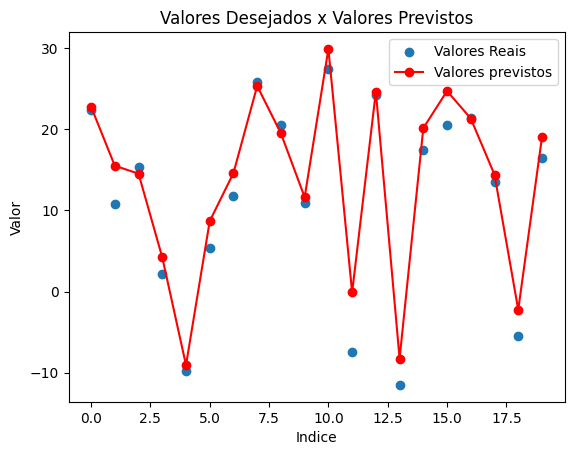

In [5]:
# Exibição dos vaores de entrada
print('Dados de Entrada')
print(x_test)

print('-'*20) # Adiciona um separador entre as entradas e saídas -> Utilizada nessa parte para melhorar a representação visual

# Previsão dos dados de teste
pred = ridge_lr.predict(x_test)

# Previsão dos dados de Teste
print('Dados Previstos')
print(pred)

# Visualização dos dados previstos e saídas esperadas

# Criação de um array para unir os dados previstos e dados esperados
data = [range(len(pred)),y_test, pred]

# Criação da visualização dos dados previstos
plt.scatter(data[0], data[1], label = 'Valores Reais')
plt.plot(data[0], data[2], marker = 'o', color = 'red', label = 'Valores previstos')
plt.title('Valores Desejados x Valores Previstos')
plt.xlabel('Indice')
plt.ylabel('Valor')
plt.legend()
plt.show()

Dessa forma, percebe-se que para realizar uma previsão é necessário que os dados estejam ordenados na forma de um Array com a seguinte estrutura.

features = [[x11, x12], [x21, x22], ..., [xni, xni]] ou um dataframe cujas colunas sejam as necessárias para as previsões.

Da mesma forma, após aplicar o método `.predict()` o resultado é um Array de mesma estrutura, porém, contendo os valores previstos (isso é, o valor de y para a respectiva entrada x, no array forncecido). Sendo assim:

`*nome_do_modelo*.predict(features)`, retorna: [[y1], [y2], ..., [yn]]   

onde:   

y1 é a previsão feita com a entrada x11, x12 [...] x - y2 é a previsão feita com a entrada x21, x22 [...] - etc...

> Esse modelo também pode pode ser usado de forma simples, isso é, pode também possuir apenas uma feature (x) e um target (y)

> Esse modelo também pode ser usado de forma polinomial, isso é, aplicando os dados após tratar com a classe PolynomialFeatures()

#
[<- Anterior](lassoregression.ipynb) | [Próximo ->](elasticnetregression.ipynb)